In [1]:
from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt

*Periodic traffic lights*

In [2]:
light_ew = PeriodicTrafficLight()
light_ew.initialize(period=30, time_delay=0)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Adaptive traffic lights*

In [8]:
light_ew = AdaptiveTrafficLight()
#light_ew.initialize()

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Single four-way intersection*

In [3]:
network = Model1.IntersectionNetworkSimulator()
network.initialize(grid_dimensions=(1,1))
network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, avg_arrival_time_n=4, avg_arrival_time_e=3, avg_arrival_time_s=4, avg_arrival_time_w=3)
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
network.set_observable_intersections(grid_inds=network.grid_inds)

*Evaluation*

In [4]:
evaluators = []

In [9]:
evaluator = Evaluator()
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
evaluator.initialize(network=network)
output = evaluator.simulate(num_trials=50, end_time=600, delta_t=0.1)
average = evaluator.compute_average()
evaluators += [evaluator]

In [3]:
evaluators = []
green_ratios = [0.3, 0.4, 0.5, 0.6, 0.7]

for green_ratio in green_ratios:
    evaluator = Evaluator()
    network.intersections[(0,0)].traffic_light_ew.green_ratio=green_ratio
    evaluator.initialize(network=network)
    output = evaluator.simulate(num_trials=50, end_time=600, delta_t=0.1)
    average = evaluator.compute_average()
    
    evaluators += [evaluator]

In [10]:
multi_eval = MultiEvaluator()
multi_eval.initialize(evaluators=evaluators, labels=["periodic", "adaptive"])

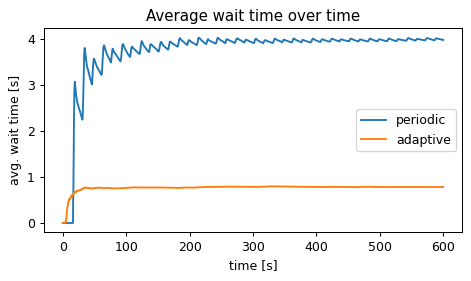

In [11]:
fig,ax = multi_eval.plot_avg_wait_times(plt=plt, fig_size=(6,3))
plt.savefig('figs/periodic_vs_adaptive_wait_time', bbox_inches='tight')

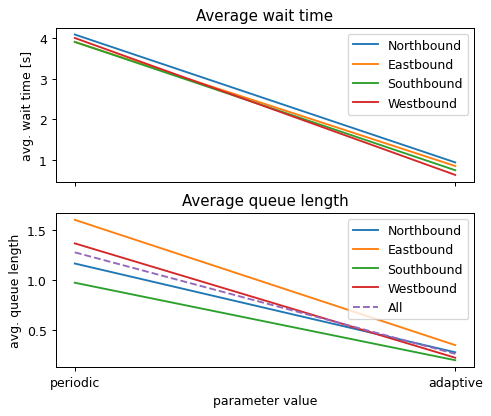

In [12]:
fig,axs = multi_eval.plot_averages(plt=plt, grid_ind=(0,0), fig_size=(6,10))
plt.savefig('figs/periodic_vs_adaptive_averages', bbox_inches='tight')

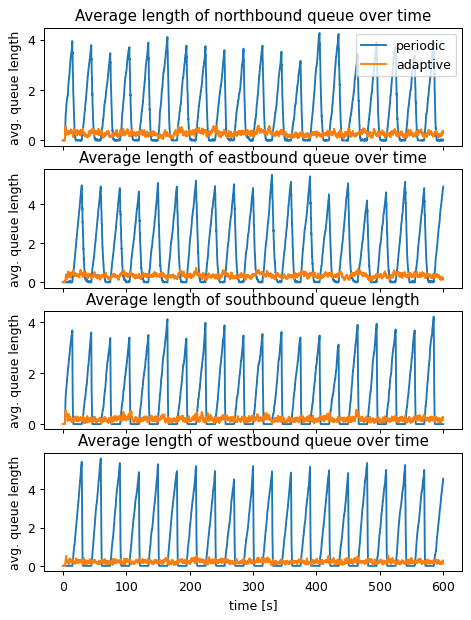

In [13]:
fig,axs = multi_eval.plot_avg_queue_lengths(plt=plt, grid_ind=(0,0), fig_size=(6,8))
plt.savefig('figs/periodic_vs_adaptive_queue_length', bbox_inches='tight')